# Recommender System: Collaborative filtering on Music dataset

## User-based collaborative filtering

In [9]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dask.dataframe as ddf
import psutil
 
#Loading the dataset using dask
memory_timestep_3 = psutil.virtual_memory()
 
data = ddf.read_csv("song_data.csv")
 
memory_timestep_4 = psutil.virtual_memory()
 
memory_used_ddf = (memory_timestep_4[3] - memory_timestep_3[3])/(1024*1024)
print("Memory acquired using dask: %.4f MB"%memory_used_ddf)
 
 
#Loading the dataset using pandas
memory_timestep_1 = psutil.virtual_memory()
 
data = pd.read_csv("song_data.csv")
 
memory_timestep_2 = psutil.virtual_memory()
 
memory_used_pd = (memory_timestep_2[3] - memory_timestep_1[3])/(1024*1024)
print("Memory acquired using pandas: %.4f MB"%memory_used_pd)

Memory acquired using dask: 8.2031 MB
Memory acquired using pandas: 63.2617 MB


In [10]:
data.head()

,User_id,Song_id,Listen_count,Title,Artist,Song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [11]:
data.shape

(1048575, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   User_id       1048575 non-null  object
 1   Song_id       1048575 non-null  object
 2   Listen_count  1048575 non-null  int64 
 3   Title         1048575 non-null  object
 4   Artist        1048575 non-null  object
 5   Song          1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [13]:
data.dtypes

User_id         object
Song_id         object
Listen_count     int64
Title           object
Artist          object
Song            object
dtype: object

In [14]:
data.memory_usage(deep=True) 

Index                 128
User_id         101711775
Song_id          78643125
Listen_count      8388600
Title            78968993
Artist           74194845
Song             96481478
dtype: int64

In [15]:
n_listen_count = len(data['Listen_count'].unique())
n_song = len(data['Song_id'].unique())
n_users = len(data['User_id'].unique())

In [16]:
print(f"Number of Listen_count: {n_listen_count}")
print(f"Number of unique Song_id: {n_song}")
print(f"Number of unique User_id: {n_users}")
print(f"Average Listen_count per user: {round(n_listen_count/n_users, 2)}")
print(f"Average Listen_count per Song: {round(n_listen_count/n_song, 2)}")

Number of Listen_count: 272
Number of unique Song_id: 10000
Number of unique User_id: 62347
Average Listen_count per user: 0.0
Average Listen_count per Song: 0.03


In [17]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data['User_id']= label_encoder.fit_transform(data['User_id'])
data['Song_id']= label_encoder.fit_transform(data['Song_id'])

In [18]:
user_freq = data[['User_id', 'Song_id']].groupby('User_id').count().reset_index()
user_freq.columns = ['User_id', 'n_listen_count']
user_freq.head()

,User_id,n_listen_count
0,0,7
1,1,5
2,2,9
3,3,9
4,4,14


In [19]:
# Find Lowest and Highest listened song:
mean_listen_count = data.groupby('User_id')[['Listen_count']].mean()

# Lowest listened songs
lowest_listen_count = mean_listen_count['Listen_count'].idxmin()
data.loc[data['User_id'] == lowest_listen_count]

,User_id,Song_id,Listen_count,Title,Artist,Song
523971,13,1069,1,Give It Up (LP Version),Pepper,Give It Up (LP Version) - Pepper
523972,13,3292,1,Tequila,The Champs,Tequila - The Champs
523973,13,8495,1,The Message,Grandmaster Flash & The Furious Five,The Message - Grandmaster Flash & The Furious ...


In [20]:
# Highest listened songs
highest_listen_count = mean_listen_count['Listen_count'].idxmax()
data.loc[data['User_id'] == highest_listen_count]

,User_id,Song_id,Listen_count,Title,Artist,Song
420918,47074,6386,28,He Wasn\'t Man Enough,Toni Braxton,He Wasn\'t Man Enough - Toni Braxton
420919,47074,9814,356,Officially Missing You (Radio Version),Tamia,Officially Missing You (Radio Version) - Tamia


In [101]:
# Which songs are getting repeated

%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=data[data.Listen_count==1]
song_repeats=repeats.groupby('Song',as_index=False).User_id.count()
song_repeats.columns=['Song','Listen_count']

print("Top 20 songs repeated")
repeats.Song.value_counts()[:20]

Top 20 songs repeated


Sehr kosmisch - Harmonia                                                                                                                        2395
Dog Days Are Over (Radio Edit) - Florence + The Machine                                                                                         1976
Undo - Björk                                                                                                                                    1873
Secrets - OneRepublic                                                                                                                           1731
Revelry - Kings Of Leon                                                                                                                         1629
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner    1617
Tive Sim - Cartola                                                                                        

In [22]:
data.groupby('Song')['Listen_count'].mean().sort_values(ascending=False).head()

Song
Crack Under Pressure - Righteous Pigs         24.260870
221 - keller williams                         19.886792
The Quest - HYPOCRISY                         15.745098
Working With Homesick - Homesick James        15.600000
Hounds of Love (new mix) - The Futureheads    15.162791
Name: Listen_count, dtype: float64

In [23]:
data.groupby('Song')['Listen_count'].count().sort_values(ascending=False).head()

Song
Sehr kosmisch - Harmonia                                   5599
Undo - Björk                                               4937
You\'re The One - Dwight Yoakam                            4499
Dog Days Are Over (Radio Edit) - Florence + The Machine    4246
Revelry - Kings Of Leon                                    4060
Name: Listen_count, dtype: int64

In [24]:
Listen_mean_count = pd.DataFrame(data.groupby('Song')['Listen_count'].mean())

In [25]:
Listen_mean_count['Listen_count_avg'] = pd.DataFrame(data.groupby('Song')['Listen_count'].count())

In [26]:
Listen_mean_count.head()

,Listen_count,Listen_count_avg
Song,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,1.545455,44
#40 - DAVE MATTHEWS BAND,5.511364,176
& Down - Boys Noize,1.906977,129
(Anaesthesia) Pulling Teath - Metallica,2.617647,34
(Antichrist Television Blues) - Arcade Fire,1.590164,61


## Visualizations

<AxesSubplot:>

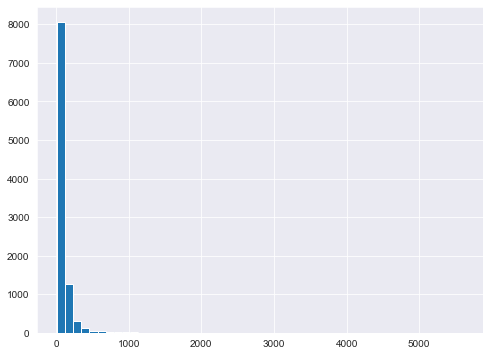

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Listen_mean_count['Listen_count_avg'].hist(bins=50)

<AxesSubplot:>

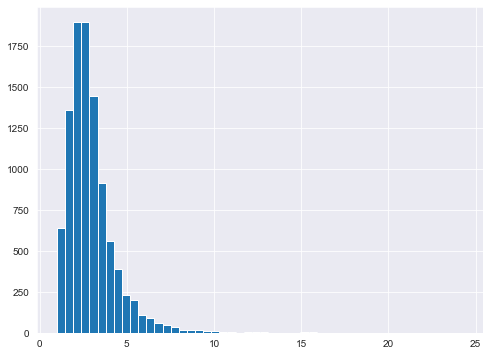

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Listen_mean_count['Listen_count'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

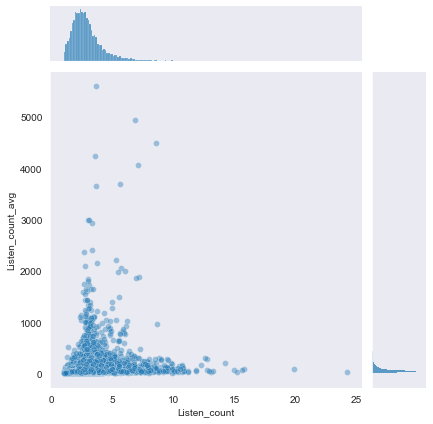

In [30]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Listen_count', y='Listen_count_avg', data=Listen_mean_count, alpha=0.4)

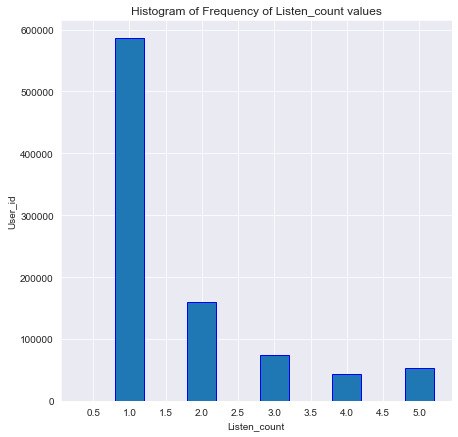

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

bin_edges = np.arange(0.25,5.5,0.5)

plt.hist(data['Listen_count'],bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Frequency of Listen_count values')
plt.xlabel('Listen_count')
plt.ylabel('User_id')
plt.grid('on')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

In [32]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

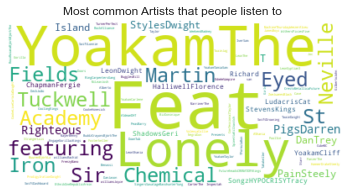

In [33]:
g=data.sort_values(by='Listen_count',ascending=False)[:200].Artist.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common Artists that people listen to ')

Text(0, 0.5, 'Listen_count')

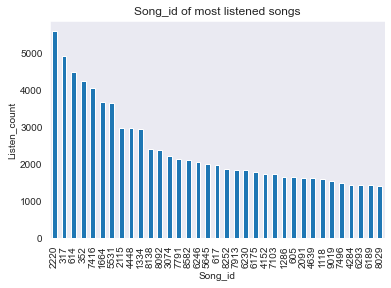

In [34]:
data.Song_id.value_counts()[:35].plot(kind='bar')
plt.title('Song_id of most listened songs')
plt.xlabel('Song_id')
plt.ylabel('Listen_count')

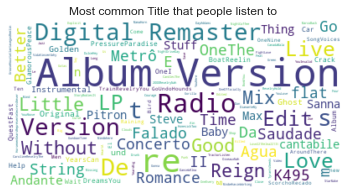

In [35]:
g=data.sort_values(by='Listen_count',ascending=False)[:200].Title.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common Title that people listen to ')

## USER BASED COLLABORATIVE FILTERING¶

The system becomes very simple when you imagine the following event flow in the user based collaborative

Step 1: Find people who listen 60 percent or more of the same songs like myself

Step 2: After finding these people, choose the ones closest in likes to you

Step 3: Suggest songs to you that the people I chose in step 2 listened but you didn't listen

That's the whole thing

In [53]:
df= data[data['Listen_count']>10]
df

,User_id,Song_id,Listen_count,Title,Artist,Song
76,18438,1811,13,Ghosts \'n\' Stuff (Original Instrumental Mix),Deadmau5,Ghosts \'n\' Stuff (Original Instrumental Mix)...
86,18438,8773,18,Push It,Salt-N-Pepa,Push It - Salt-N-Pepa
87,18438,9037,12,Speechless,Lady GaGa,Speechless - Lady GaGa
112,54455,8861,11,Corn Bread,DAVE MATTHEWS BAND,Corn Bread - DAVE MATTHEWS BAND
128,37970,8270,16,Raining Again (Steve Angello\'s Vocal Mix),Moby,Raining Again (Steve Angello\'s Vocal Mix) - Moby
...,...,...,...,...,...,...
1048509,46787,7172,11,Milkshake,Kelis,Milkshake - Kelis
1048515,46787,8626,61,Everything You Touch We Touch First (America\'...,George Lopez,Everything You Touch We Touch First (America\'...
1048516,46787,8936,95,Colors Of The Wind,Vanessa Williams,Colors Of The Wind - Vanessa Williams
1048518,46787,9824,141,Red To Black (Album Version),Fort Minor (Featuring Kenna_ Jonah Matranga An...,Red To Black (Album Version) - Fort Minor (Fea...


In [80]:
data_subset = data[['User_id', 'Song', 'Listen_count']]
data_subset.head()

,User_id,Song,Listen_count
0,44830,The Cove - Jack Johnson,1
1,44830,Entre Dos Aguas - Paco De Lucia,2
2,44830,Stronger - Kanye West,1
3,44830,Constellations - Jack Johnson,1
4,44830,Learn To Fly - Foo Fighters,1


In [81]:
df = data_subset[data_subset['Listen_count']>=10]
df

,User_id,Song,Listen_count
66,36702,You Get What You Give - New Radicals,10
73,36702,Who\'s Real - Jadakiss / Swizz Beatz / OJ Da J...,10
76,18438,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,18438,Push It - Salt-N-Pepa,18
87,18438,Speechless - Lady GaGa,12
...,...,...,...
1048509,46787,Milkshake - Kelis,11
1048515,46787,Everything You Touch We Touch First (America\'...,61
1048516,46787,Colors Of The Wind - Vanessa Williams,95
1048518,46787,Red To Black (Album Version) - Fort Minor (Fea...,141


In [82]:
user_song_df = df.pivot_table(index=["User_id"], columns=["Song"], values="Listen_count")
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
User_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
user_song_df.index = df.User_id.unique()
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
36702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Impute those NaNs with 0 values
user_song_df.fillna(0, inplace=True)
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
36702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [86]:
user_sim = 1 - pairwise_distances( user_song_df.values,metric='cosine')

In [87]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [88]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [89]:
#Set the index and column names to user ids 
user_sim_df.index = df.User_id.unique()
user_sim_df.columns = df.User_id.unique()

In [90]:
user_sim_df.iloc[0:5, 0:5]

,36702,18438,54455,37970,41040
36702,1.0,0.0,0.0,0.0,0.0
18438,0.0,1.0,0.0,0.0,0.0
54455,0.0,0.0,1.0,0.0,0.0
37970,0.0,0.0,0.0,1.0,0.0
41040,0.0,0.0,0.0,0.0,1.0


In [91]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,36702,18438,54455,37970,41040
36702,0.0,0.0,0.0,0.0,0.0
18438,0.0,0.0,0.0,0.0,0.0
54455,0.0,0.0,0.0,0.0,0.0
37970,0.0,0.0,0.0,0.0,0.0
41040,0.0,0.0,0.0,0.0,0.0


In [92]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

36702     2039
18438    43245
54455    62138
37970    25656
41040    35527
dtype: int64

In [93]:
df[(df['User_id']==41040) | (df['User_id']==11756)]

,User_id,Song,Listen_count
175,41040,I Want You Back - Shione Yukawa,26
177,41040,Don\'t Leave - Faithless,16
178,41040,Nervous Breakdown - Rise Against,12
179,41040,Stretchin\' Out (In A Rubber Band) (LP Version...,19
688835,11756,TULENLIEKKI - M.A. Numminen,11
688840,11756,Frisch und g\'sund - Die Mooskirchner,17
688841,11756,Rock \'n\' Roll - Generation X,20


In [94]:
user_1=df[df['User_id']==18438] 

In [95]:
user_2=df[df['User_id']==25656]

In [96]:
user_2

,User_id,Song,Listen_count
123215,25656,You\'re The One - Dwight Yoakam,59
123228,25656,She Is Love - Parachute,10
123236,25656,Revelry - Kings Of Leon,15
123242,25656,Ain\'t Misbehavin - Sam Cooke,27


In [98]:
pd.merge(user_1,user_2,on='Song',how='outer')

,User_id_x,Song,Listen_count_x,User_id_y,Listen_count_y
0,18438.0,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13.0,NaN,NaN
1,18438.0,Push It - Salt-N-Pepa,18.0,NaN,NaN
2,18438.0,Speechless - Lady GaGa,12.0,NaN,NaN
3,NaN,You\'re The One - Dwight Yoakam,NaN,25656.0,59.0
4,NaN,She Is Love - Parachute,NaN,25656.0,10.0
5,NaN,Revelry - Kings Of Leon,NaN,25656.0,15.0
6,NaN,Ain\'t Misbehavin - Sam Cooke,NaN,25656.0,27.0


## Item Based Collabrative Filtering

In [115]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

In [116]:
columns = ['User_id', 'Song', 'Listen_count']
data_subset = data[['User_id', 'Song', 'Listen_count']]
data_subset.head()

,User_id,Song,Listen_count
0,44830,The Cove - Jack Johnson,1
1,44830,Entre Dos Aguas - Paco De Lucia,2
2,44830,Stronger - Kanye West,1
3,44830,Constellations - Jack Johnson,1
4,44830,Learn To Fly - Foo Fighters,1


In [117]:
df = data_subset[data_subset['Listen_count']>=10]
df

,User_id,Song,Listen_count
66,36702,You Get What You Give - New Radicals,10
73,36702,Who\'s Real - Jadakiss / Swizz Beatz / OJ Da J...,10
76,18438,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,18438,Push It - Salt-N-Pepa,18
87,18438,Speechless - Lady GaGa,12
...,...,...,...
1048509,46787,Milkshake - Kelis,11
1048515,46787,Everything You Touch We Touch First (America\'...,61
1048516,46787,Colors Of The Wind - Vanessa Williams,95
1048518,46787,Red To Black (Album Version) - Fort Minor (Fea...,141


In [118]:
Listen_count_crosstab = df.pivot_table(values='Listen_count', index='User_id', columns='Song', fill_value=0)
Listen_count_crosstab.head()

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
User_id,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
X = Listen_count_crosstab.T

In [125]:
SVD = TruncatedSVD(n_components=3, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(8484, 3)

In [121]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(8484, 8484)

# Find Similar Songs

## Similar Song to Glamorous - Fergie / Ludacris

In [123]:
col_idx = Listen_count_crosstab.columns.get_loc("Glamorous - Fergie / Ludacris")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Songs': Listen_count_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Songs
2589,1.000000,Glamorous - Fergie / Ludacris
2766,0.999997,Halo - The Pussycat Dolls
4566,0.999997,Milkshake - Kelis
5742,0.999993,Red To Black (Album Version) - Fort Minor (Fea...
2855,0.999896,Heart Of A Champion - Nelly / Lincoln Universi...
2132,0.998500,Everything You Touch We Touch First (America\'...
1326,0.997315,Colors Of The Wind - Vanessa Williams
413,0.995577,Angels Cry - Mariah Carey
4361,0.995233,Made Of Scars (Album Version) - Stone Sour
6456,0.995124,Someone Wake Me Up (Album Version) - The Veron...


## Similar Song to Speechless - Lady GaGa

In [124]:
col_idx = Listen_count_crosstab.columns.get_loc("Speechless - Lady GaGa")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Songs': Listen_count_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Songs
6549,1.000000,Speechless - Lady GaGa
3958,0.997508,Lambada - Kaoma
705,0.997311,Beneath The Surface - GZA/Genius / Killah Priest
1709,0.996079,Dissident - Pearl Jam
7668,0.996015,Twenty-Six Temptations (Album version) - Devot...
6725,0.996015,Such A Lovely Thing (Album version) - Devotchka
5878,0.995967,Rocker - Alter Ego
6763,0.995941,Sunday Morning - No Doubt
1858,0.995929,Dream - Priscilla Ahn
1946,0.995603,East Man Skank - Ja-Man All Stars
